# Script XA DSA
This notebook imports necessary libraries and data from Excel files to work with ...

In [1]:
from xa_dose_analysis import dt_ids7_export_module as bh_utils
from xa_dose_analysis import mapping_module as bh_map
from xa_dose_analysis import plot_module as bh_plot
import pandas as pd



# Import the DoseTrack data:
root_folder1 = "/run/media/bhosteras/PRIVATE_USB/Intervensjon Doser/DoseTrack - Serienivå/2023/"
root_folder2 = "/run/media/bhosteras/PRIVATE_USB/Intervensjon Doser/DoseTrack - Serienivå/2024/"
root_folder3 = "/run/media/bhosteras/PRIVATE_USB/Intervensjon Doser/DoseTrack - Serienivå/2025/"
df_ids7_2025 = bh_utils.import_excel_files_to_dataframe(root_folder1)
df_ids7_2024 = bh_utils.import_excel_files_to_dataframe(root_folder2)
df_ids7_2023 = bh_utils.import_excel_files_to_dataframe(root_folder3)
# Merge the dataframes for all years:
df_dt = pd.concat([df_ids7_2025, df_ids7_2024, df_ids7_2023], ignore_index=True)


# Import the IDS7 data:
root_folder1 = "/run/media/bhosteras/PRIVATE_USB/Intervensjon Doser/IDS7/2023/"
root_folder2 = "/run/media/bhosteras/PRIVATE_USB/Intervensjon Doser/IDS7/2024/"
root_folder3 = "/run/media/bhosteras/PRIVATE_USB/Intervensjon Doser/IDS7/2025/"    
df_dt_2025 = bh_utils.import_excel_files_to_dataframe(root_folder1)
df_dt_2024 = bh_utils.import_excel_files_to_dataframe(root_folder2)
df_dt_2023 = bh_utils.import_excel_files_to_dataframe(root_folder3)
# Merge the dataframes for all years:
df_ids7 = pd.concat([df_dt_2025, df_dt_2024, df_dt_2023], ignore_index=True)

del df_ids7_2025, df_ids7_2024, df_ids7_2023, df_dt_2025, df_dt_2024, df_dt_2023

Reading /run/media/bhosteras/PRIVATE_USB/Intervensjon Doser/DoseTrack - Serienivå/2023/2023-12 - OUS.xlsx...
Reading /run/media/bhosteras/PRIVATE_USB/Intervensjon Doser/DoseTrack - Serienivå/2023/2023-08 - OUS.xlsx...
Reading /run/media/bhosteras/PRIVATE_USB/Intervensjon Doser/DoseTrack - Serienivå/2023/2023-01 - OUS.xlsx...
Reading /run/media/bhosteras/PRIVATE_USB/Intervensjon Doser/DoseTrack - Serienivå/2023/2023-11 - OUS.xlsx...
Reading /run/media/bhosteras/PRIVATE_USB/Intervensjon Doser/DoseTrack - Serienivå/2023/2023-06 - OUS.xlsx...
Reading /run/media/bhosteras/PRIVATE_USB/Intervensjon Doser/DoseTrack - Serienivå/2023/2023-04 - OUS.xlsx...
Reading /run/media/bhosteras/PRIVATE_USB/Intervensjon Doser/DoseTrack - Serienivå/2023/2023-10 - OUS.xlsx...
Reading /run/media/bhosteras/PRIVATE_USB/Intervensjon Doser/DoseTrack - Serienivå/2023/2023-07 - OUS.xlsx...
Reading /run/media/bhosteras/PRIVATE_USB/Intervensjon Doser/DoseTrack - Serienivå/2023/2023-05 - OUS.xlsx...
Reading /run/media/

In [2]:
# Run all cleanups, filters and checks:
df_ids7 = bh_utils.run_all_cleanup_filters_and_checks(df_ids7, df_dt, True)
# Merge the dataframes:
data = bh_utils.merge_ids7_dt(df_ids7, df_dt, True)

Dropping unnecessary column: Prioritet- og lesemerkeikon
Dropping unnecessary column: Lagt til i demonstrasjon-ikon
Dropping unnecessary column: Status
Number of rows with NaT in the column "Bestilt dato og tidspunkt": 3543
Number of cancelled procedures: 2505
Number of non-human subjects: 201
Number of rows with invalid accession number: 18
1673     NNUL000009420412
6847     NBOU000007962455
6848     NBOU000007962455
9090     NORRAD0004436111
9091     NORRAD0004436111
9093     NORRAD0004443460
12153    NNRA000008470721
12154    NNRA000008470721
15681    NNRA000008253963
24728    NORRAD0004440016
42560    NNRA000009433721
55625    NNUL000009507772
55626    NNUL000009507772
55627    NNUL000009612281
62922    NBOU000012935221
73966    NNRA000009532398
73967    NNRA000009578608
86689    NBOU000017196075
Name: Henvisnings-ID, dtype: str
1277 entries was found matching the old siemens PACS format (7 characters long with only numbers.)
These will be converted to the new Sectra PACS format by

In [ ]:
# Print all unique elements in Modality Room, sorted alphabetically:
print("Unique elements in Modality Room:")
print(sorted(data['Modality Room'].unique()))

In [3]:
# Representative doser for radiologisk Rikshospital
data_pci = data[data['Modality Room'].isin(['IRH_XA6', 'IRH_XA7', 'KRH_XA3', 'KRH_XA6', 'KRH_XA7', 'KRH_XA8','KUL_XA1', 'KUL_XA2', 'KUL_XA4'])]
from xa_dose_analysis.mapping_dicts import mapping_dict_PCI as pci_dict
import importlib
importlib.reload(pci_dict)

# Get the mapping dictionary:
mapping_dict = pci_dict.get_PCI_mapping_dict()
data_pci = bh_map.map_procedures(data_pci, mapping_dict, True)


Mapping procedures...

RGV Cor Mitraclip (int.) -> Mitraclip
RGA Cor TAVI (int.) -> TAVI
RGA Cor Koronarangiografi (int.) & ~RGA Cor PCI & ~RGA Cor PTSMA & ~RGA Cor ECMO & ~RGV Cor PFO & ~RGA Cor TAVI -> Coronary angiography
RGA Cor PCI & ~RGA Cor ECMO & ~RGA Cor TAVI -> PCI
RGA Cor PTSMA (int.) & ~RGA Cor PCI -> PTSMA
RGV Cor PFO (int.) -> PFO


Reporting doses for Koronarangiografi:


Alle: n =    0, DAP: Median - nan, 95% CI: [nan - nan] IQR [nan - nan], Range (nan - nan).


--------------------------------------------------






/home/bhosteras/Kode/XA_DoseAnalysis/src/xa_dose_analysis/plot_module.py:251: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


ValueError: cannot convert float NaN to integer

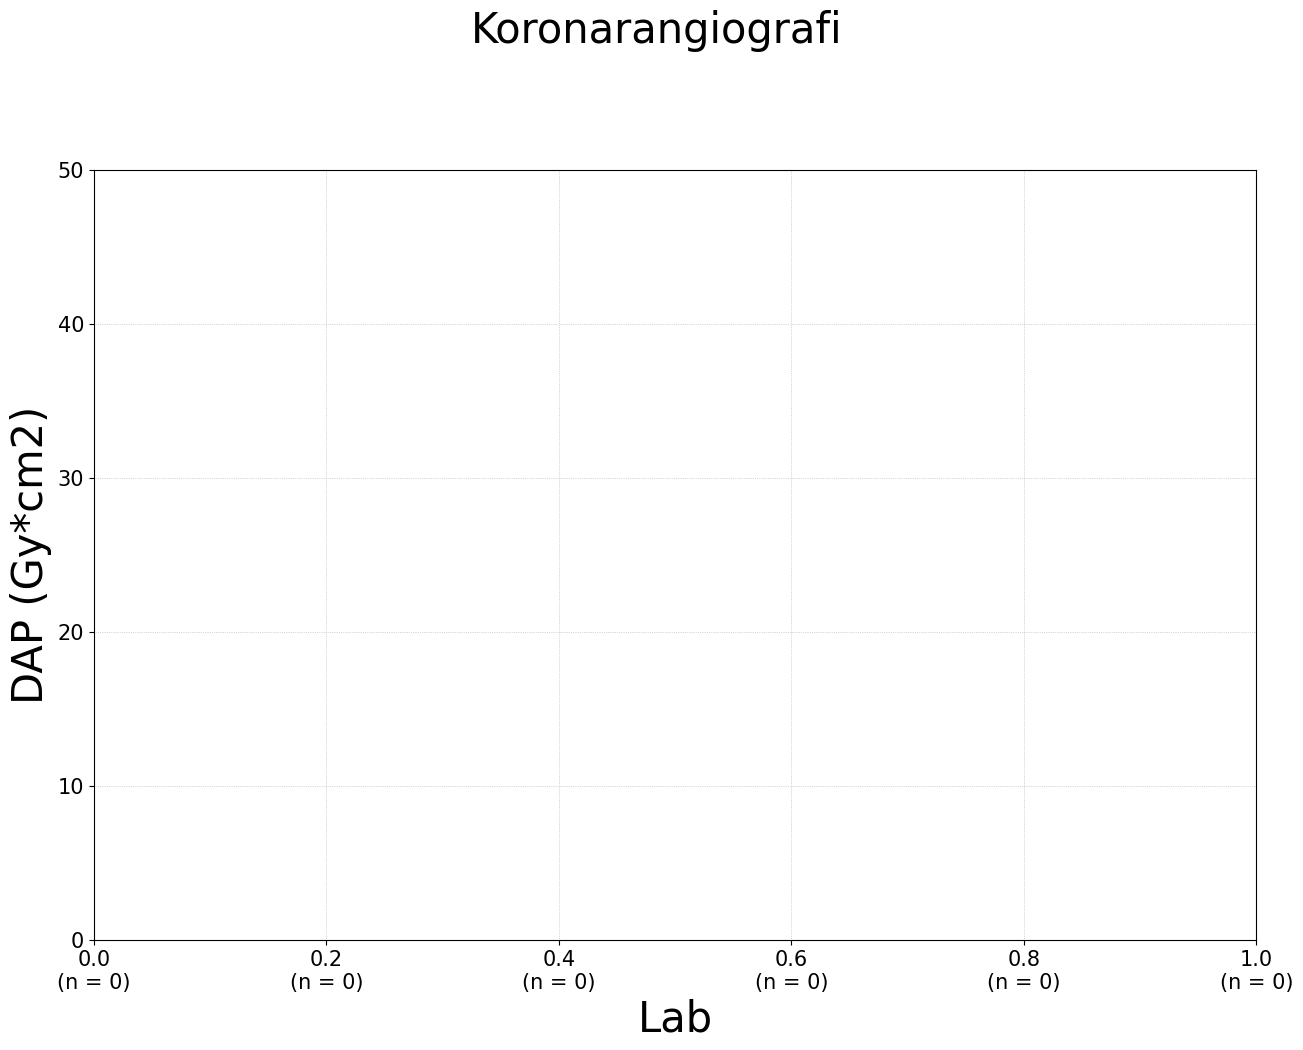

In [ ]:
from xa_dose_analysis import plot_module as bh_plot
from xa_dose_analysis import reporting_module as bh_report

importlib.reload(bh_plot)
importlib.reload(bh_report)
def run_analysis(data, procedure, y):
    export = False
    bh_plot.plot_representative_dose(data, procedure, y, export)
    print('\n')
    bh_report.report_exposure_time_all(data[data['Mapped Procedures'] == procedure], True)
    print('\n')
    bh_report.report_exposure_time_per_lab(data[data['Mapped Procedures'] == procedure], True)
    print('\n')
    print('###############################################')
    print('\n')
    

run_analysis(data_pci, 'Coronary angiography', 50)
run_analysis(data_pci, 'PCI', 100)
run_analysis(data_pci, 'TAVI', 75)
run_analysis(data_pci, 'Mitraclip', 100)
run_analysis(data_pci, 'PTSMA', 100)
run_analysis(data_pci, 'PFO', 20)